In [10]:
# Step 1: Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

In [11]:
# Step 2: Load the dataset
data = pd.read_csv("Datasets/diabetes.csv")

In [12]:
# Display the first few rows of the dataset
print("First 5 rows of the dataset:\n", data.head())

# Check the shape of the dataset
print("\nShape of the dataset:", data.shape)

# Check for missing values
print("\nMissing values in each column:\n", data.isnull().sum())

First 5 rows of the dataset:
    Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  

Shape of the dataset: (768, 9)

Missing values in each column:
 Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    

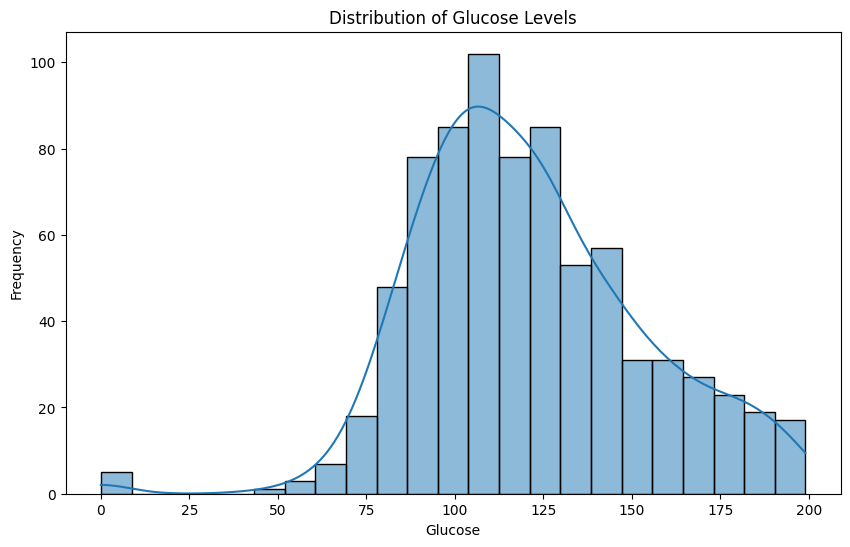

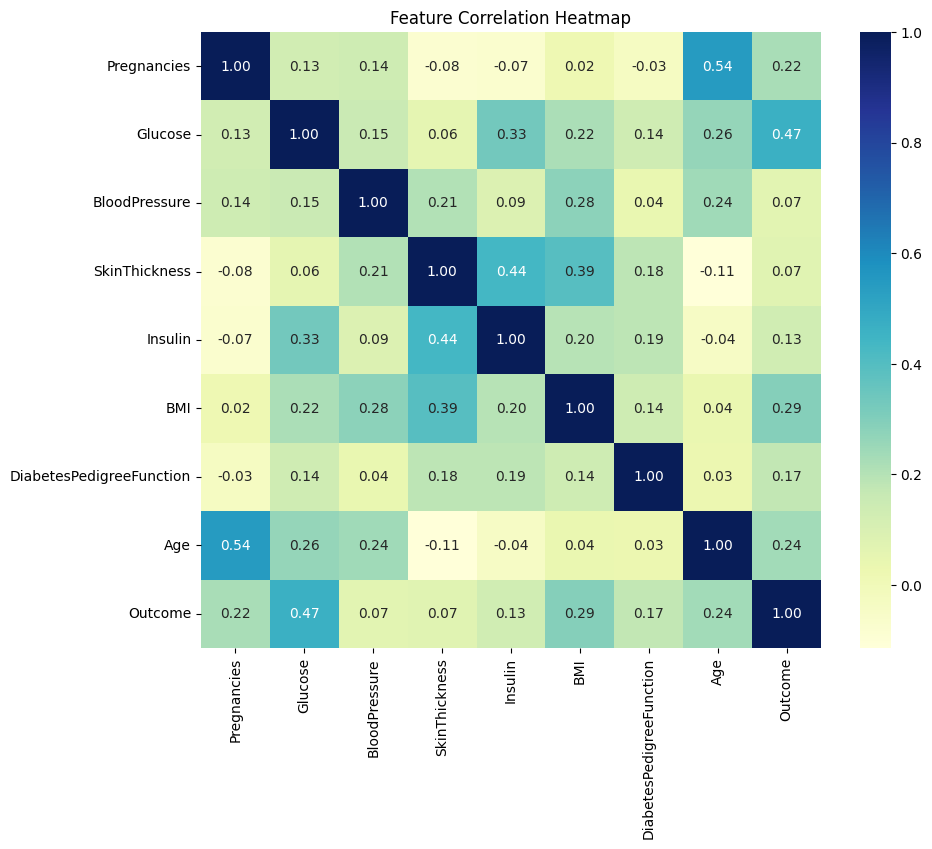

In [13]:
# Step 3: Exploratory Data Analysis (EDA)

# 3.1: Visualize feature distributions
plt.figure(figsize=(10, 6))
sns.histplot(data['Glucose'], kde=True)
plt.title("Distribution of Glucose Levels")
plt.xlabel("Glucose")
plt.ylabel("Frequency")
plt.show()

# 3.2: Create a correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap="YlGnBu", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

In [14]:
# Step 4: Handle Missing Values
# For this example, we'll assume there are no missing values.
# If there were missing values, we could use SimpleImputer to handle them.
# Here's how you could handle zeros in certain columns as missing values:
columns_with_zeros = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
imputer = SimpleImputer(missing_values=0, strategy='mean')
data[columns_with_zeros] = imputer.fit_transform(data[columns_with_zeros])

In [15]:
# Step 5: Split data into features and target variable
X = data.drop('Outcome', axis=1)  # Features
y = data['Outcome']  # Target variable

# Split the dataset into training and testing sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [16]:
# Step 6: Standardize the Data
# Standardizing the feature data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [17]:
# Step 7: Build and Train Models

# 7.1: Random Forest Classifier (Standard Model)
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Predictions
y_pred_rf = rf_model.predict(X_test)

In [28]:
# 7.2: Bagging Classifier
bagging_model = BaggingClassifier(n_estimators=10, random_state=42)
bagging_model.fit(X_train, y_train)

BaggingClassifier(random_state=42)

In [19]:
# Predictions
y_pred_bagging = bagging_model.predict(X_test)

In [20]:
# Step 8: Evaluate Models
# Evaluate Random Forest model
print("Random Forest Model Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))

# Evaluate Bagging Classifier model
print("Bagging Classifier Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred_bagging))
print("\nClassification Report:\n", classification_report(y_test, y_pred_bagging))

Random Forest Model Performance:
Accuracy: 0.7532467532467533

Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.81      0.81        99
           1       0.65      0.65      0.65        55

    accuracy                           0.75       154
   macro avg       0.73      0.73      0.73       154
weighted avg       0.75      0.75      0.75       154

Bagging Classifier Performance:
Accuracy: 0.7532467532467533

Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.86      0.82        99
           1       0.69      0.56      0.62        55

    accuracy                           0.75       154
   macro avg       0.73      0.71      0.72       154
weighted avg       0.75      0.75      0.75       154



Text(158.22222222222223, 0.5, 'True Label')

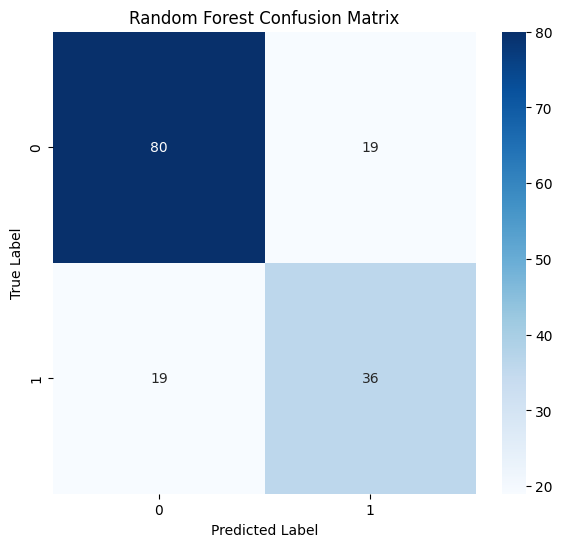

In [24]:
# Step 9: Visualize the Results

# 9.1: Plot confusion matrix for Random Forest model
plt.figure(figsize=(15, 6))
plt.subplot(1, 2, 1)
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt="d", cmap="Blues")
plt.title("Random Forest Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")

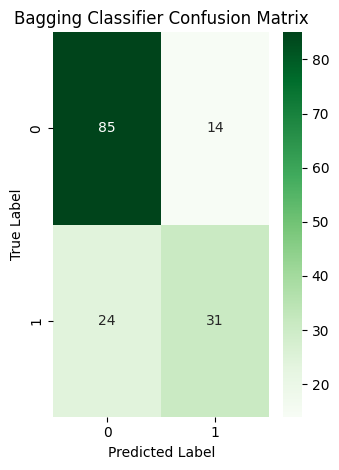

In [26]:
# Plot confusion matrix for Bagging Classifier
plt.subplot(1, 2, 2)
sns.heatmap(confusion_matrix(y_test, y_pred_bagging), annot=True, fmt="d", cmap="Greens")
plt.title("Bagging Classifier Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")

plt.tight_layout()
plt.show()

C:\Users\Jess John\AppData\Local\Temp\ipykernel_28844\135967361.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=model_names, y=accuracies, palette="viridis")


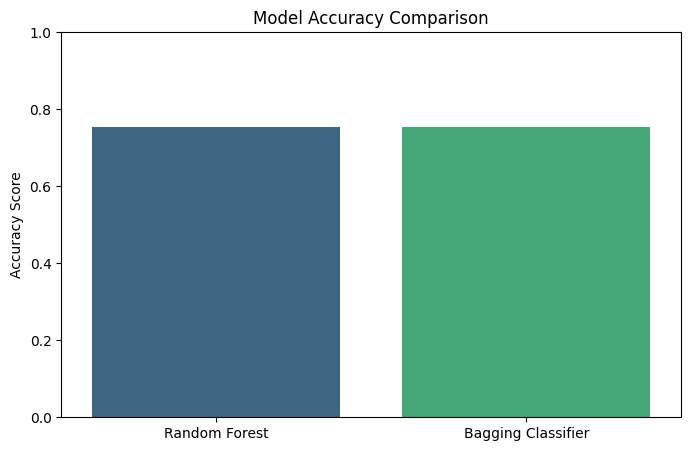

In [23]:
# 9.2: Compare model accuracies visually
model_names = ['Random Forest', 'Bagging Classifier']
accuracies = [accuracy_score(y_test, y_pred_rf), accuracy_score(y_test, y_pred_bagging)]

plt.figure(figsize=(8, 5))
sns.barplot(x=model_names, y=accuracies, palette="viridis")
plt.title("Model Accuracy Comparison")
plt.ylabel("Accuracy Score")
plt.ylim(0, 1)
plt.show()